## Linear Regression ##
Richard Sowers 2018-05-16

Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [1]:
import numpy
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import scipy.optimize

In [2]:
numpy.random.seed(0)
N=100
err_scale=0.1
M=2
B=3

In [3]:
xvals=numpy.random.normal(size=N)
yvals=M*xvals+B+numpy.random.normal(scale=err_scale,size=N)
data=[(x,y) for (x,y) in zip(xvals,yvals)]
print(data[:10])

[(1.764052345967664, 6.716419761640953), (0.4001572083672233, 3.665538510620202), (0.9787379841057392, 4.830427468362905), (2.240893199201458, 7.578726069218717), (1.8675579901499675, 6.617803639788519), (-0.977277879876411, 1.2398063588121073), (0.9500884175255894, 4.858814936975204), (-0.1513572082976979, 2.6225401022605284), (-0.10321885179355784, 2.9858564990609224), (0.41059850193837233, 3.9692484830201873)]


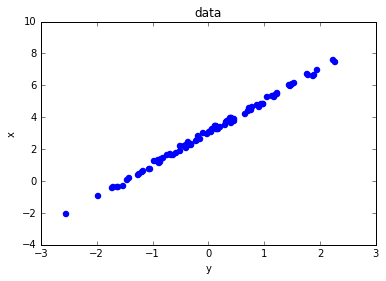

In [4]:
plt.figure()
plt.scatter(xvals,yvals,color="blue",linewidth=2)
plt.ylabel("x")
plt.xlabel("y")
plt.title("data")
plt.show()
plt.close()

In [5]:
class Regression:
    def __init__(self,data):
        self.xvals=[x for (x,_) in data]
        self.yvals=[y for (_,y) in data]
        self.ctr=0
        
    def make_linear_function(self,m,b):
        def linear_function(x):
            return m*x+b
        return linear_function
    
    def Err(self,x):
        (m,b)=x
        linear_function=self.make_linear_function(m,b)
        err=yvals-linear_function(xvals)
        return numpy.mean(err**2) ## could use numpy.sum
    
    def callback(self,x):
        print("ctr="+str(self.ctr)+"; x="+str(x)+"; error="+str(self.Err(x)))
        self.ctr+=1
               
Reg=Regression(data)
print("\nxvals:\n"+str(Reg.xvals[:10]))
print("\nyvals:\n"+str(Reg.yvals[:10]))
line=Reg.make_linear_function(2,4)
print("\nline(1)="+str(line(1)))
print("\nError([2,4])="+str(Reg.Err([2,4])))


xvals:
[1.764052345967664, 0.4001572083672233, 0.9787379841057392, 2.240893199201458, 1.8675579901499675, -0.977277879876411, 0.9500884175255894, -0.1513572082976979, -0.10321885179355784, 0.41059850193837233]

yvals:
[6.716419761640953, 3.665538510620202, 4.830427468362905, 7.578726069218717, 6.617803639788519, 1.2398063588121073, 4.858814936975204, 2.6225401022605284, 2.9858564990609224, 3.9692484830201873]

line(1)=6

Error([2,4])=0.9943700250800238


In [6]:
out=scipy.optimize.minimize(Reg.Err,[0,0],callback=Reg.callback)
print(out)
(m,b)=out.x
print("estimated (m,b)="+str((m,b)))

ctr=0; x=[0.58639197 0.82234084]; error=7.228301456479807
ctr=1; x=[1.84216169 2.91619636]; error=0.04998171705709775
ctr=2; x=[2.08619748 2.95909595]; error=0.018175924291563228
ctr=3; x=[2.00567556 3.03284476]; error=0.0112299693729346
ctr=4; x=[2.00998543 3.00584268]; error=0.010577059443415738
ctr=5; x=[2.011621   3.00753101]; error=0.01057174236489278
ctr=6; x=[2.01146752 3.00751759]; error=0.010571718551991332
      fun: 0.010571718551991332
 hess_inv: array([[ 0.5010781 , -0.03821743],
       [-0.03821743,  0.51045214]])
      jac: array([-4.44578473e-06,  4.30725049e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([2.01146752, 3.00751759])
estimated (m,b)=(2.0114675209969843, 3.0075175936414005)
